In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../jax_model/results_cnn_two_losses.csv')
print(df.columns)
#df['objective'] = -df['objective'].astype(float)

Index(['p:activation', 'p:batch_size', 'p:hidden_dim', 'p:kernel_size', 'p:lr',
       'p:num_layers', 'objective', 'job_id', 'm:timestamp_submit',
       'm:timestamp_gather', 'm:timestamp_start', 'm:timestamp_end',
       'm:train_losses', 'm:val_losses'],
      dtype='object')


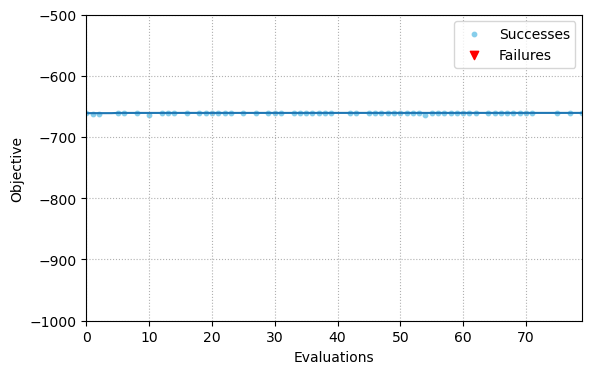

In [3]:
from deephyper.analysis.hpo import plot_search_trajectory_single_objective_hpo
fig, ax = plt.subplots()
ax.set_box_aspect(1/1.62)
ax.set_ylim(-1000, -500)
ax.grid(linestyle='dotted')
plot_search_trajectory_single_objective_hpo(df, ax=ax)
fig.savefig('../../docs/updates/figs/precondCNN_cond_inv_loss_hpo.png', dpi=500, bbox_inches='tight')

In [18]:
# print out the best config
import ast
import re
print(df['objective'])
df = df[df['objective']!='F']
print(df)





df_sorted = df.sort_values('objective')

train_loss = np.asarray(ast.literal_eval(df.iloc[0]['m:train_losses']))

val_loss = df_sorted.iloc[-1]['m:val_losses']
pattern = re.compile(r'array\(([\d.]+), dtype=float32\)')
matches = pattern.findall(val_loss)

# Convert the matches to a list of floats
val_loss = [float(match) for match in matches]



0        -661.0109
1        -662.9678
2       -662.25604
3      -10585399.0
4     -740506750.0
          ...     
70      -660.66144
71      -660.68665
75      -660.69476
77       -660.6543
79      -660.66895
Name: objective, Length: 65, dtype: object
   p:activation  p:batch_size  p:hidden_dim  p:kernel_size      p:lr  \
0          relu            32            64              3  0.001000   
1       sigmoid           249            19              2  0.043299   
2         prelu           207            83              6  0.000274   
3       sigmoid            95           108              3  0.028654   
4         prelu            34            86              4  0.028650   
..          ...           ...           ...            ...       ...   
70         tanh            97            89              7  0.001306   
71         tanh            91            84              7  0.000847   
75     softplus            62            88              5  0.000106   
77         tanh            8

Text(0, 0.5, 'Condition Number Loss')

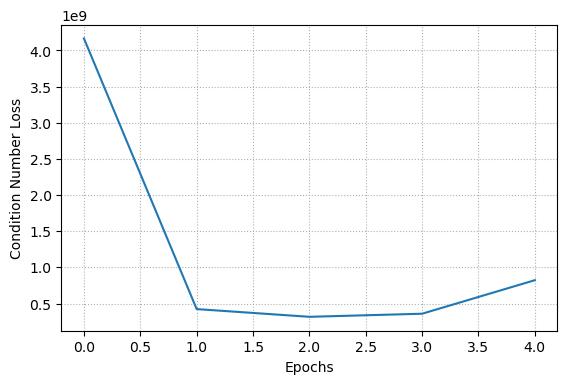

In [19]:
# plot the training and validation
fig, ax = plt.subplots()
ax.set_box_aspect(1/1.62)
ax.plot(train_loss)
ax.plot(val_loss)
ax.grid(linestyle='dotted')
ax.set_xlabel('Epochs')
ax.set_ylabel('Condition Number Loss')
#fig.savefig('../../docs/updates/figs/best-hpo-train-curve.png', dpi=500, bbox_inches='tight')
